# Análisis Exploratorio de Datos (EDA) y Correlación de Variables

Este análisis tiene como objetivo explorar las distribuciones de las variables y las correlaciones entre ellas para entender mejor los factores que afectan la deserción universitaria y los ingresos post-graduación.

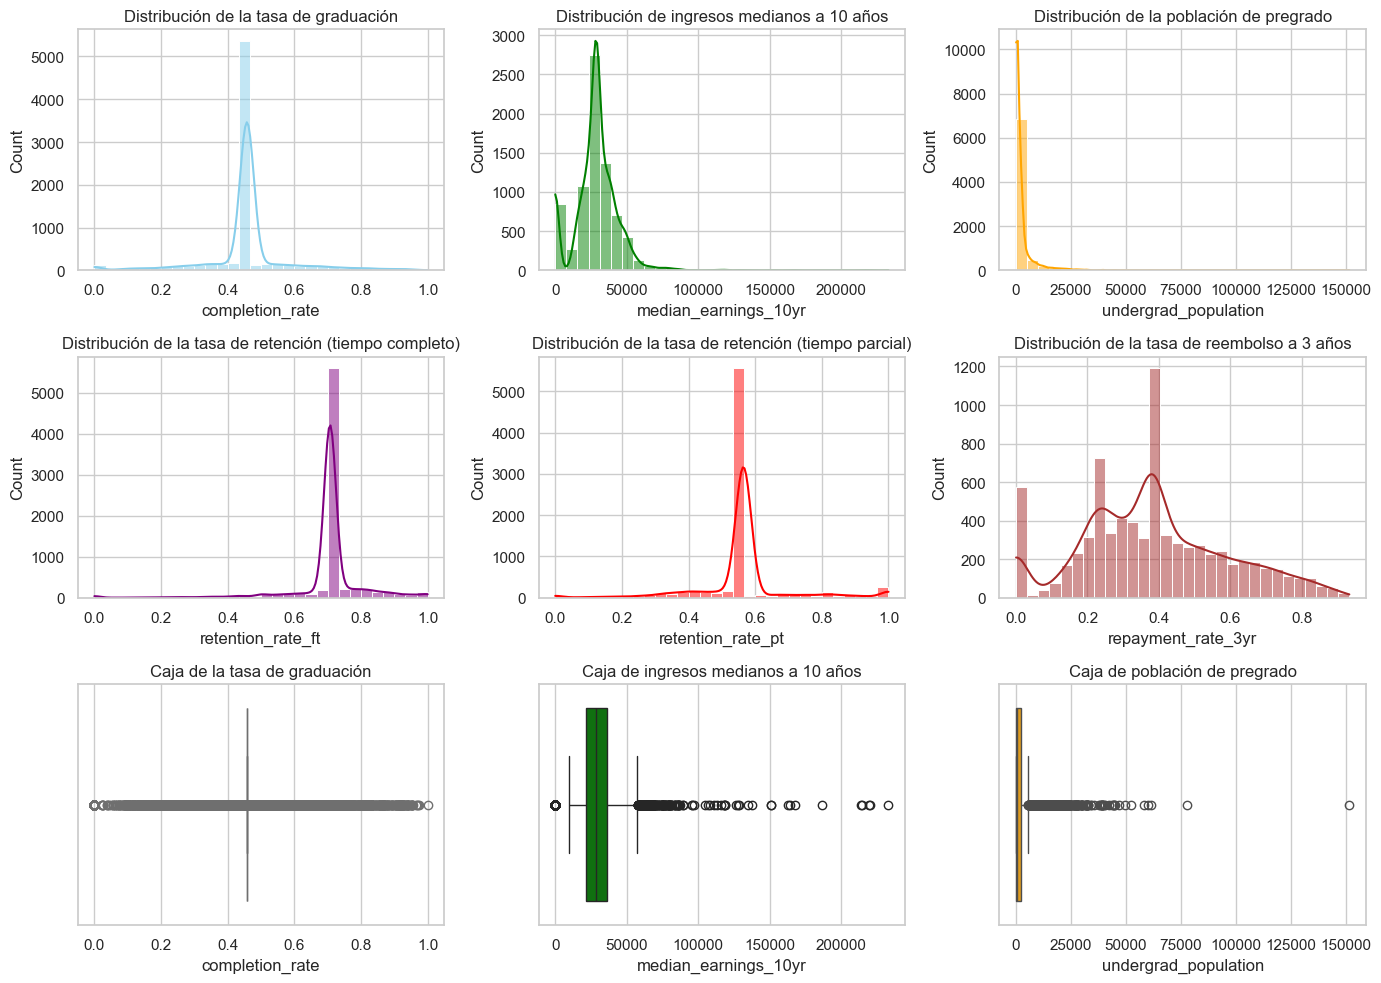

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo proporcionado
file_path = "data/data_togpt.csv"
df = pd.read_csv(file_path)

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))

# Análisis exploratorio: distribución de las variables clave
plt.subplot(3, 3, 1)
sns.histplot(df['completion_rate'], kde=True, color="skyblue", bins=30)
plt.title("Distribución de la tasa de graduación")

plt.subplot(3, 3, 2)
sns.histplot(df['median_earnings_10yr'], kde=True, color="green", bins=30)
plt.title("Distribución de ingresos medianos a 10 años")

plt.subplot(3, 3, 3)
sns.histplot(df['undergrad_population'], kde=True, color="orange", bins=30)
plt.title("Distribución de la población de pregrado")

plt.subplot(3, 3, 4)
sns.histplot(df['retention_rate_ft'], kde=True, color="purple", bins=30)
plt.title("Distribución de la tasa de retención (tiempo completo)")

plt.subplot(3, 3, 5)
sns.histplot(df['retention_rate_pt'], kde=True, color="red", bins=30)
plt.title("Distribución de la tasa de retención (tiempo parcial)")

plt.subplot(3, 3, 6)
sns.histplot(df['repayment_rate_3yr'], kde=True, color="brown", bins=30)
plt.title("Distribución de la tasa de reembolso a 3 años")

# Agregar un gráfico de caja (boxplot) para observar la dispersión de las variables
plt.subplot(3, 3, 7)
sns.boxplot(x=df['completion_rate'], color="skyblue")
plt.title("Caja de la tasa de graduación")

plt.subplot(3, 3, 8)
sns.boxplot(x=df['median_earnings_10yr'], color="green")
plt.title("Caja de ingresos medianos a 10 años")

plt.subplot(3, 3, 9)
sns.boxplot(x=df['undergrad_population'], color="orange")
plt.title("Caja de población de pregrado")

plt.tight_layout()
plt.show()
    

### Explicación del Código:

1. **Importación de librerías**: Importamos `pandas`, `matplotlib`, y `seaborn` para manejar los datos, graficar y realizar análisis visuales.

2. **Distribuciones de Variables**: Se generan gráficos de distribución (histogramas con la opción KDE) para entender cómo se distribuyen las variables clave como la tasa de graduación, ingresos post-graduación, y tasas de retención. También se incluyen gráficos de caja (boxplot) para ver la dispersión y los valores atípicos de las variables.

3. **Correlación de Variables**: Utilizamos un mapa de calor para mostrar la correlación entre las variables de interés.

4. **Análisis de Distribuciones**: Se añaden los gráficos de cajas para una visión más detallada de las distribuciones y valores atípicos.

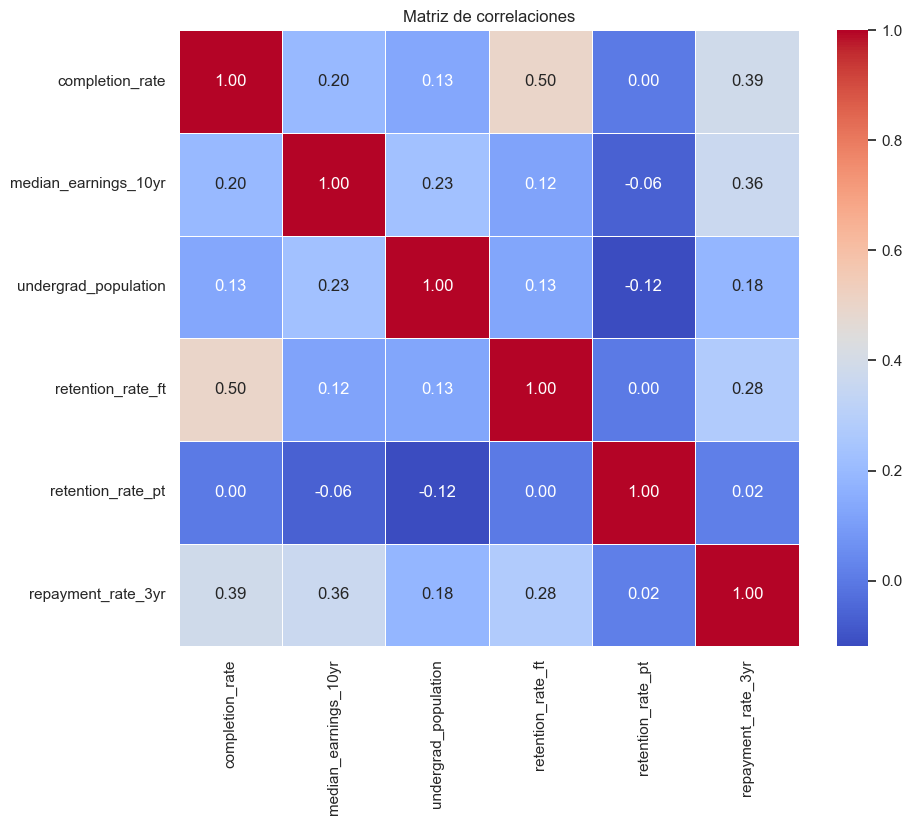

In [2]:

# Correlación entre las variables numéricas
plt.figure(figsize=(10, 8))
correlation_matrix = df[['completion_rate', 'median_earnings_10yr', 'undergrad_population',
                         'retention_rate_ft', 'retention_rate_pt', 'repayment_rate_3yr']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de correlaciones")
plt.show()
    

### Explicación del Gráfico de Correlación:

El **mapa de calor** (heatmap) muestra las relaciones de correlación entre las variables numéricas. Los valores cercanos a 1 indican una fuerte correlación positiva, mientras que los valores cercanos a -1 indican una correlación negativa fuerte. Los valores cercanos a 0 indican una correlación débil o nula.

In [3]:

# Modelo de regresión lineal para analizar la relación entre variables

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Selección de las variables predictoras (features) y la variable objetivo (target)
X = df[['undergrad_population', 'retention_rate_ft', 'retention_rate_pt', 'repayment_rate_3yr']]
y_graduation = df['completion_rate']  # Tasa de graduación como variable objetivo
y_earnings = df['median_earnings_10yr']  # Ingresos medianos a 10 años como variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train_graduation, y_test_graduation = train_test_split(X, y_graduation, test_size=0.2, random_state=42)
X_train, X_test, y_train_earnings, y_test_earnings = train_test_split(X, y_earnings, test_size=0.2, random_state=42)

# Modelo de regresión lineal para la tasa de graduación
regressor_graduation = LinearRegression()
regressor_graduation.fit(X_train, y_train_graduation)

# Predicciones
y_pred_graduation = regressor_graduation.predict(X_test)

# Evaluación del modelo
mse_graduation = mean_squared_error(y_test_graduation, y_pred_graduation)
r2_graduation = r2_score(y_test_graduation, y_pred_graduation)

# Modelo de regresión lineal para los ingresos post-graduación
regressor_earnings = LinearRegression()
regressor_earnings.fit(X_train, y_train_earnings)

# Predicciones
y_pred_earnings = regressor_earnings.predict(X_test)

# Evaluación del modelo
mse_earnings = mean_squared_error(y_test_earnings, y_pred_earnings)
r2_earnings = r2_score(y_test_earnings, y_pred_earnings)

mse_graduation, r2_graduation, mse_earnings, r2_earnings
    

(0.009851077797760534,
 0.3102002608821679,
 220387951.13837197,
 0.14955768230378175)

### Explicación del Modelo de Regresión:

1. **Selección de Variables**: En este modelo, las **variables predictoras** son la población de pregrado, las tasas de retención de tiempo completo y parcial, y la tasa de reembolso de préstamos. La **variable objetivo** es la tasa de graduación (para deserción) y los ingresos medianos a 10 años (para ingresos post-graduación).

2. **División de los Datos**: Utilizamos un 80% de los datos para entrenar el modelo y un 20% para evaluar su rendimiento.

3. **Modelo de Regresión Lineal**: Se crea un modelo de regresión lineal para cada variable objetivo y se evalúa su desempeño utilizando el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R²), que mide qué tan bien el modelo explica la variabilidad en las variables objetivo.